# DATA PRE-PROCESSING
 1. Identify Missing Values
 2. Identify Outliers  
 3. Identify Imbalanced Data
 4. Plot Data Distributions 
 5. Pair Plots & Heatmap correlations

In [3]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

warnings.filterwarnings('ignore')
df = pd.read_csv('Financial_Mexican_Firms.csv')

### 1. Identify missing values

ProposedIndex has 0.4695 % of missing values
Shannon has 0.4695 % of missing values
Debt has 0.939 % of missing values
QuickRatio has 0.939 % of missing values


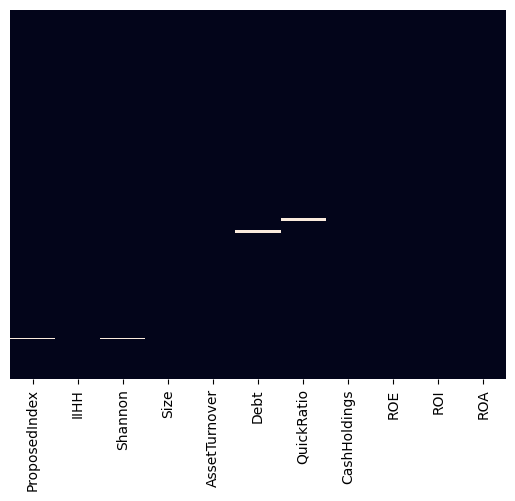

In [5]:
missing_features = [feature for feature in df.columns if df[feature].isnull().sum() > 0] 
sns.heatmap(df.isnull(), yticklabels = False, cbar = False)
for feature in missing_features:
    print(feature,'has', np.round(df[feature].isnull().mean()*100,4), '% of missing values')

### 2. Identify Outliers
    - Box Plot
    - Inter Quartile Range

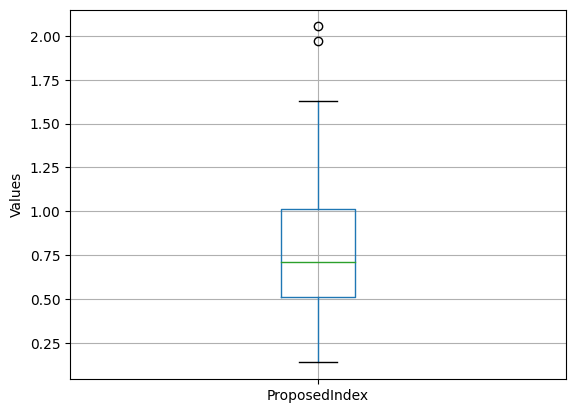

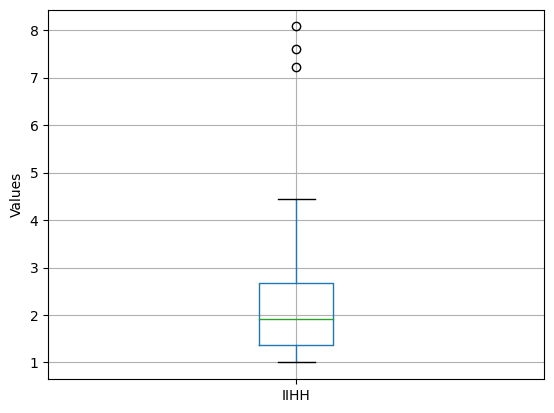

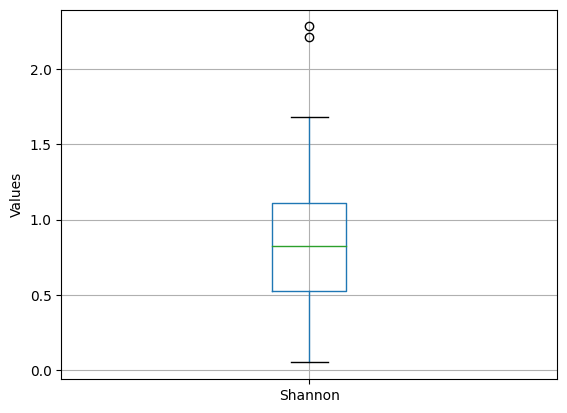

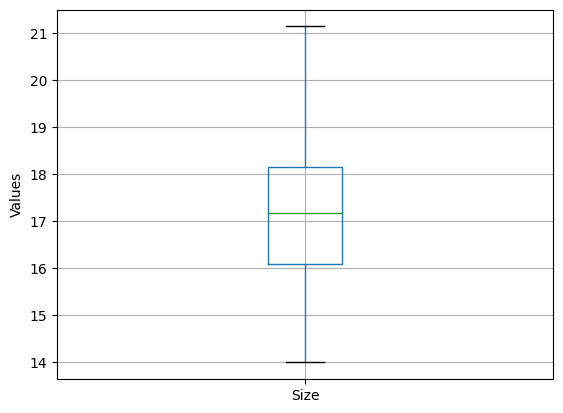

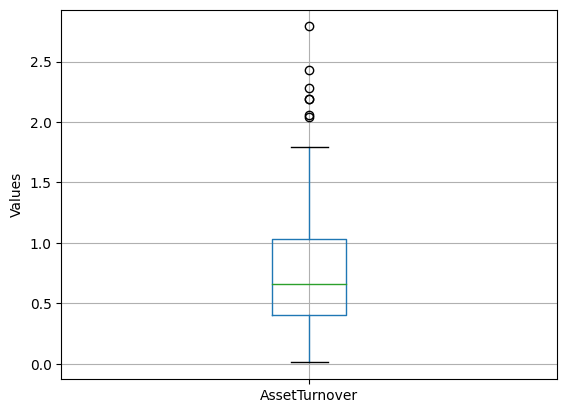

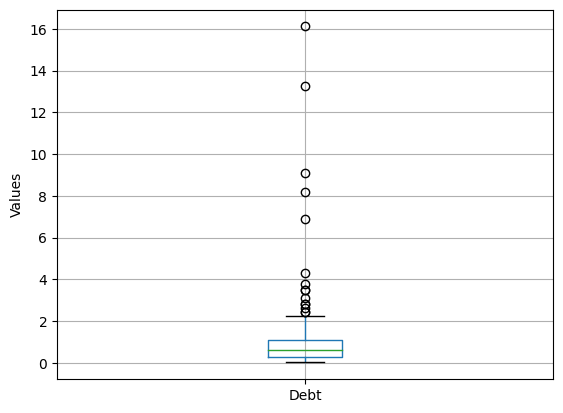

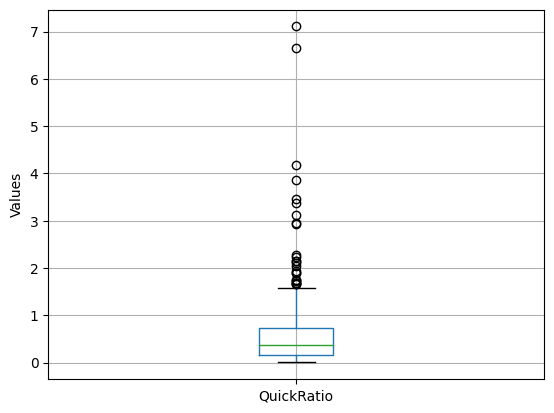

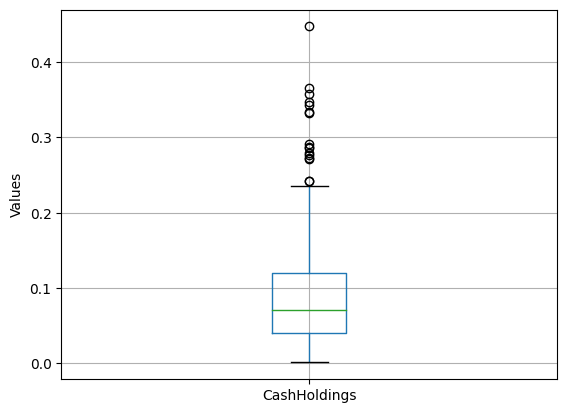

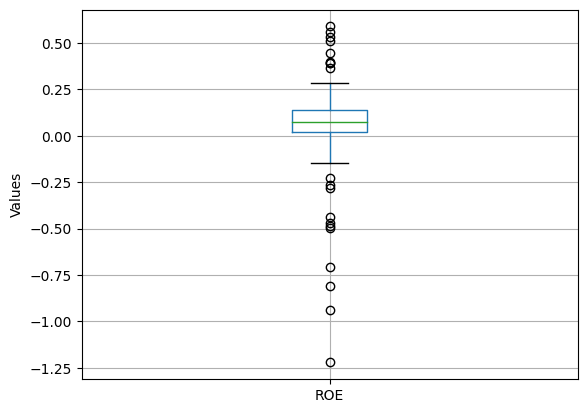

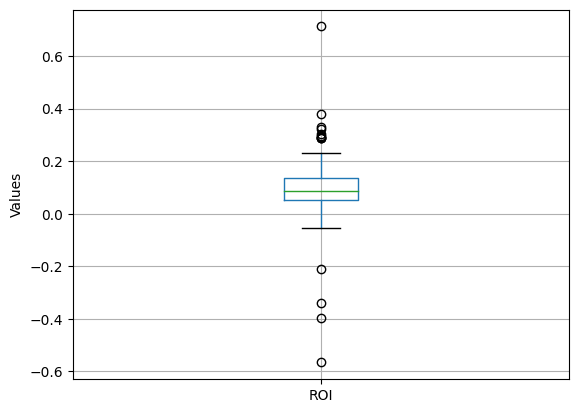

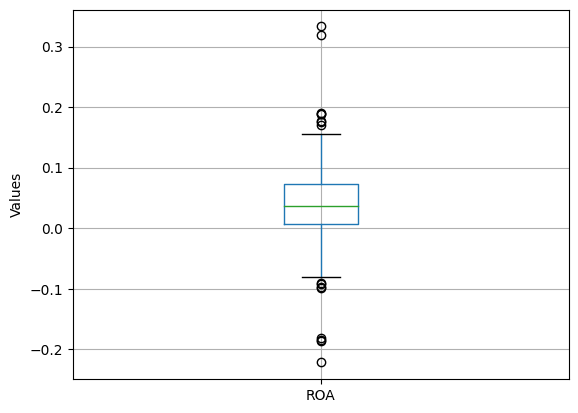

In [6]:
# Box Plot with/without LogGaussian transformation (Only for continuous variables)
for feature in df.columns:
    copy_df = df.copy()
    if 0 in copy_df[feature].unique():
        pass
    else:
        #copy_df[feature] = np.log(copy_df[feature]) # LogGaussian transformation     
        copy_df.boxplot(column = feature)
        plt.ylabel('Values')
        plt.show()

In [7]:
# Inter Quartile Range
for feature in df.columns:
    Q1 = df[feature].quantile(0.25) # Q1, Q3 = np.percentile(df[feature], [25 ,75])
    Q3 = df[feature].quantile(0.75)

    IQR = Q3 - Q1

    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)

    print('Lower_bound:', lower_bound,'  Upper_bound:', np.round(upper_bound,2),'  IQR:',np.round(IQR,2),'  Feature:', feature)

Lower_bound: -0.23862499999999986   Upper_bound: 1.76   IQR: 0.5   Feature: ProposedIndex
Lower_bound: -0.5771999999999995   Upper_bound: 4.61   IQR: 1.3   Feature: IIHH
Lower_bound: -0.35009999999999997   Upper_bound: 1.99   IQR: 0.58   Feature: Shannon
Lower_bound: 12.981449999999999   Upper_bound: 21.24   IQR: 2.07   Feature: Size
Lower_bound: -0.545   Upper_bound: 1.98   IQR: 0.63   Feature: AssetTurnover
Lower_bound: -0.9800000000000002   Upper_bound: 2.38   IQR: 0.84   Feature: Debt
Lower_bound: -0.6929000000000002   Upper_bound: 1.59   IQR: 0.57   Feature: QuickRatio
Lower_bound: -0.07970000000000002   Upper_bound: 0.24   IQR: 0.08   Feature: CashHoldings
Lower_bound: -0.15725   Upper_bound: 0.32   IQR: 0.12   Feature: ROE
Lower_bound: -0.07665   Upper_bound: 0.27   IQR: 0.09   Feature: ROI
Lower_bound: -0.08935000000000001   Upper_bound: 0.17   IQR: 0.06   Feature: ROA


In [11]:
# This returns a list of outliers of continuous features assuming normality with a threshold of 2.5 standard deviations
def outlier_detector(df):
    copy_df  = df.copy()
    copy_np  = copy_df.to_numpy()
    cutoff   = 2.5
    
    outliers = []
    
    mean = np.mean(copy_np)
    std  = np.std(copy_np)
    
    for i in copy_df:
        z_score = (i - mean)/std
        if np.abs(z_score) > cutoff:
            outliers.append(i)
            
    return pd.DataFrame(outliers) 

In [12]:
for feature in df:
    print('Outliers: {} '.format(len(outlier_detector(df[feature]))), feature)

Outliers: 0  ProposedIndex
Outliers: 3  IIHH
Outliers: 0  Shannon
Outliers: 2  Size
Outliers: 7  AssetTurnover
Outliers: 0  Debt
Outliers: 0  QuickRatio
Outliers: 7  CashHoldings
Outliers: 8  ROE
Outliers: 6  ROI
Outliers: 6  ROA


### 5. Find Data Distributions

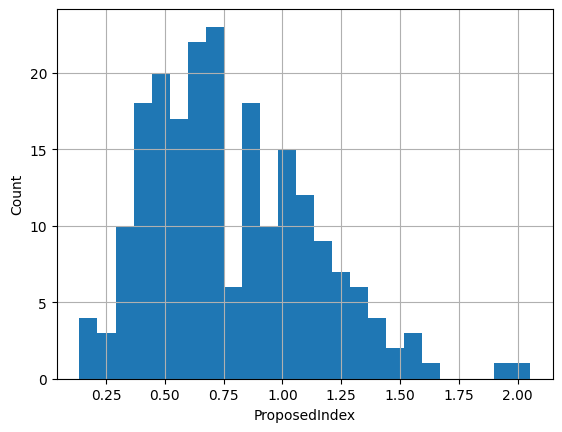

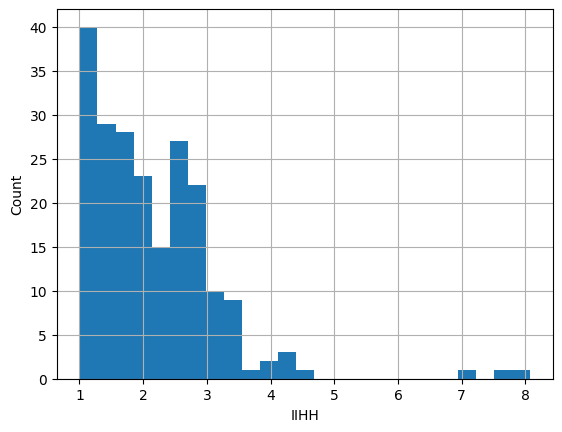

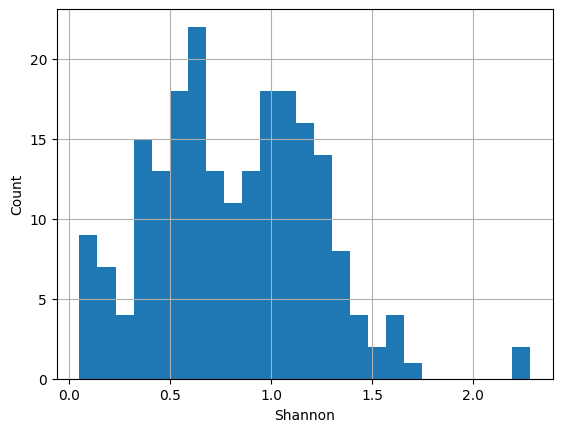

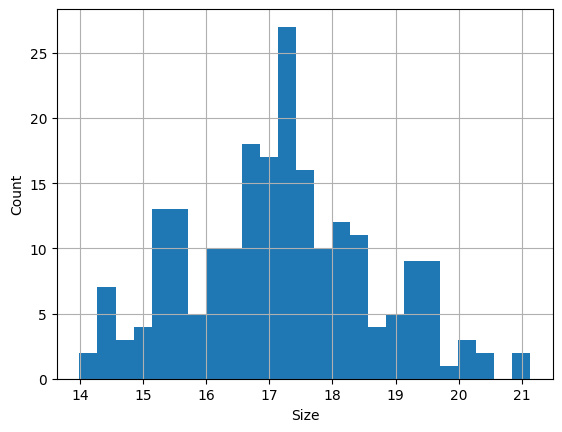

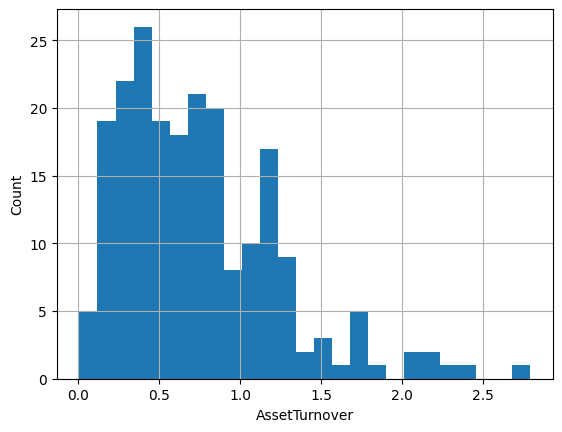

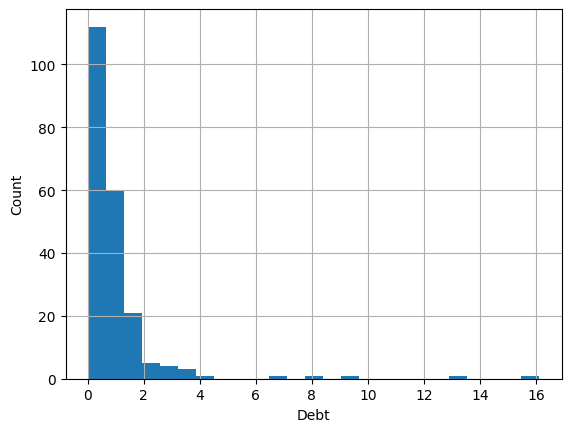

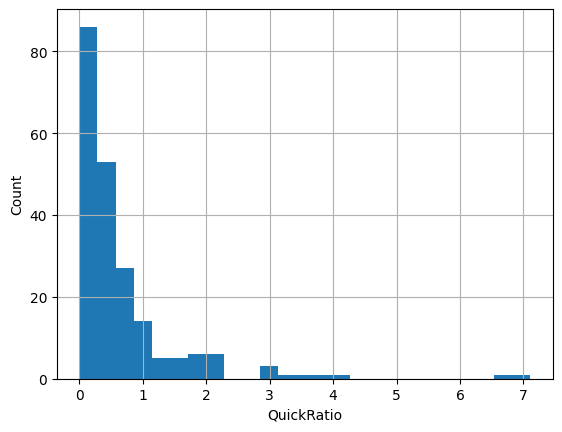

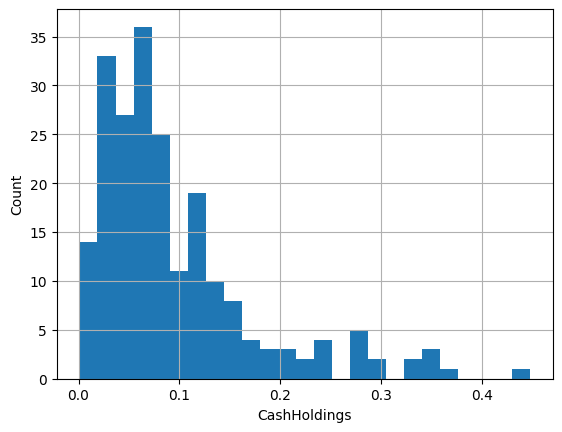

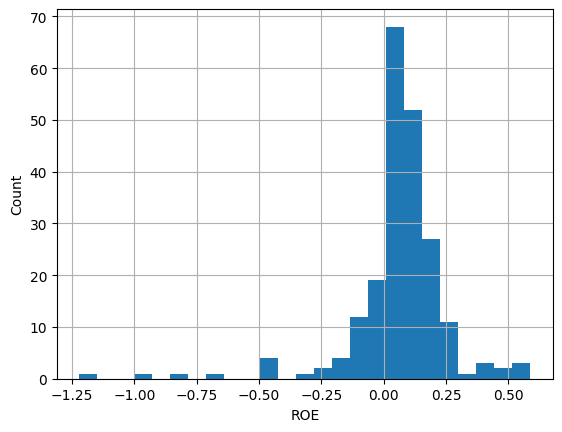

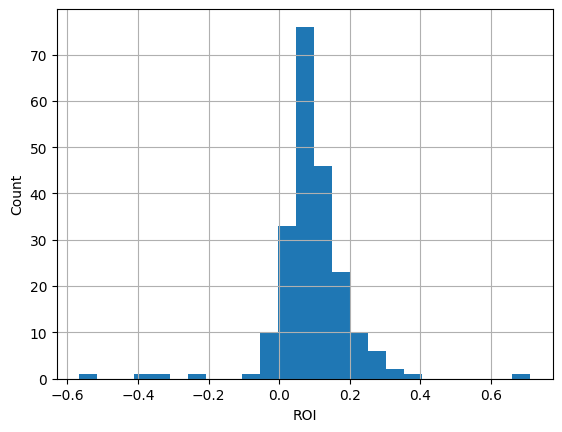

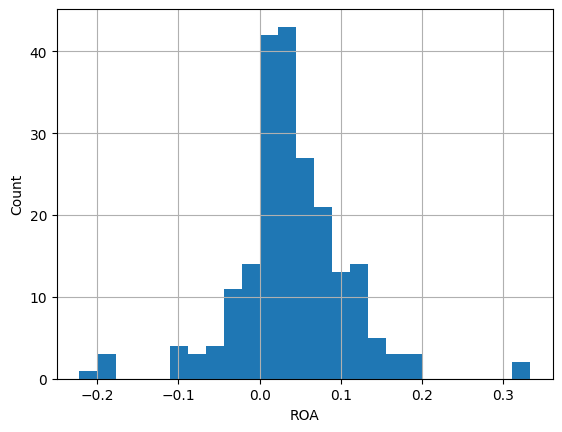

In [13]:
# Explore the distribution of each continuous feature
for feature in df.columns: 
    df[feature].hist(bins=25)
    
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

### 6. Pair Plots & Heatmap Correlations

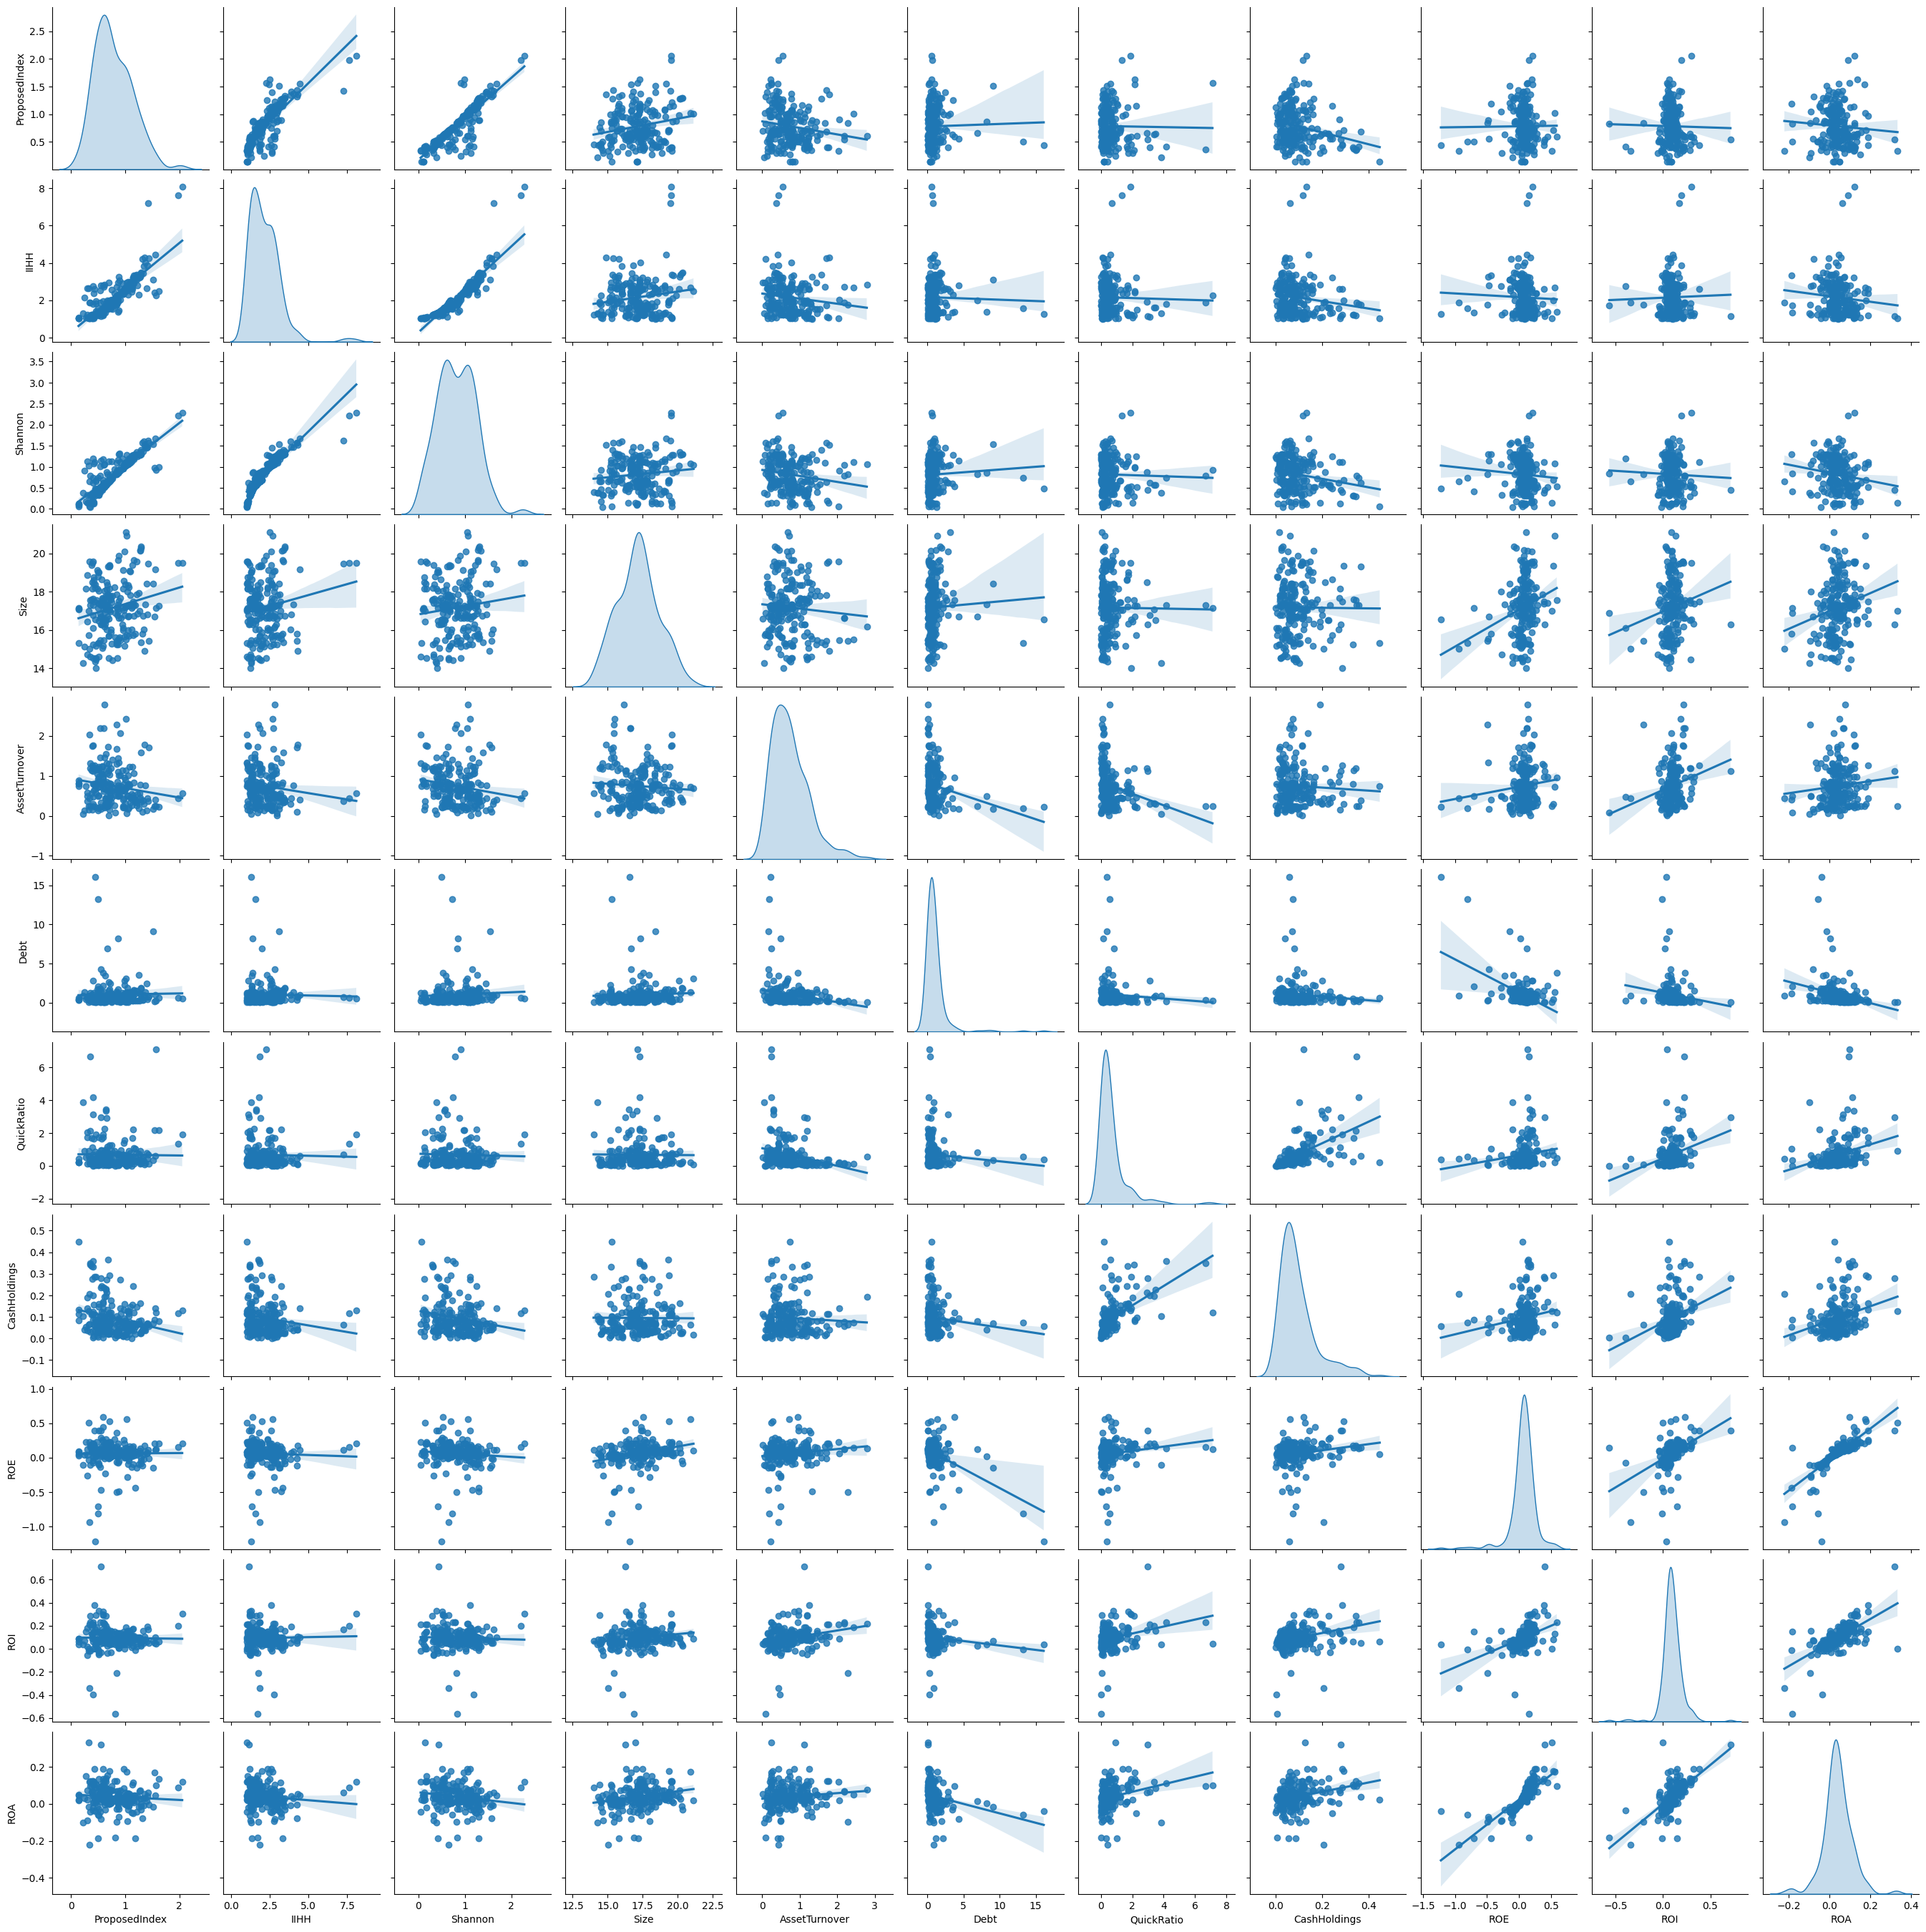

In [14]:
sns.pairplot(df,diag_kind='kde',kind='reg')

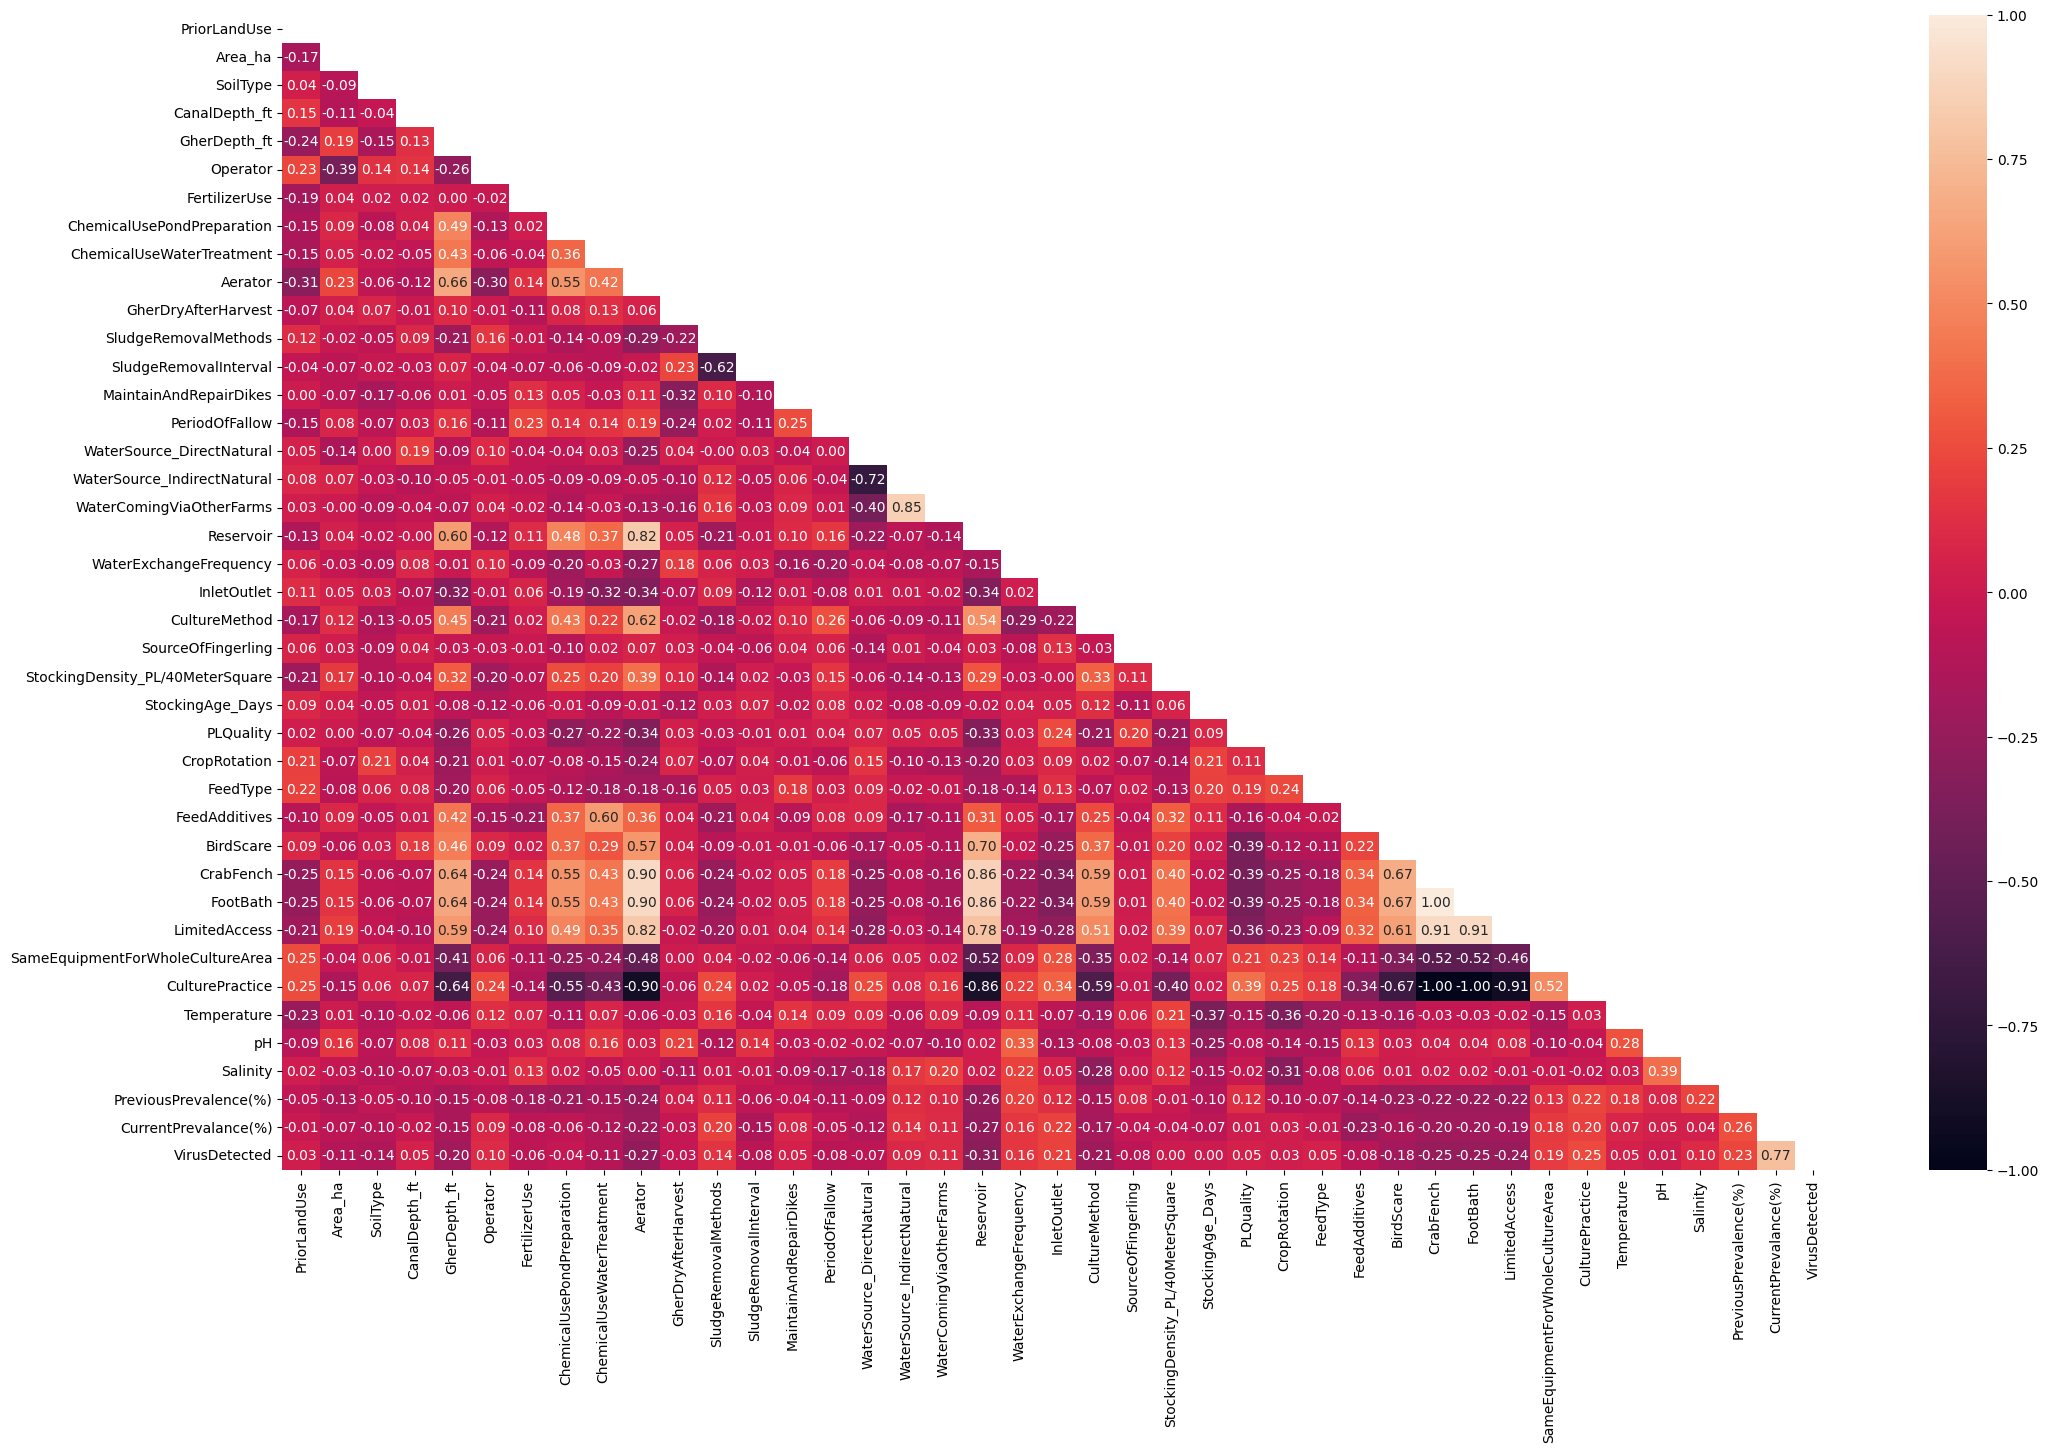

In [12]:
corr = df.corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=np.bool)) 
fig = plt.subplots(figsize=(25, 15))
sns.heatmap(df.corr(), annot=True,fmt='.2f',mask=mask)
plt.show()